# Modeling changes in intracellular pH

Basic assumptions - spherical yeast, intracellular pH is homogeneous (no organellar pH).

**GOAL:** Predict intracellular pH as a function of time and temperature; $pH_i(T, t)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=2, style="white")

## Attempt 1

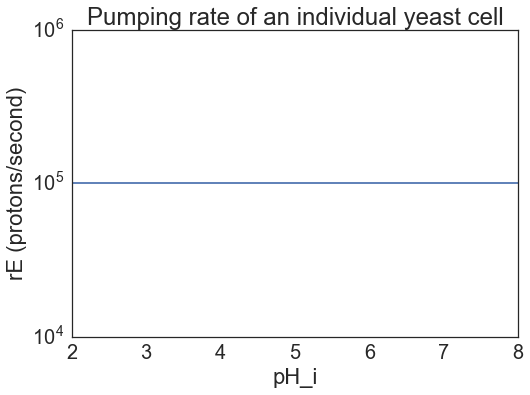

In [4]:
# First plot dependence of influx and efflux rates
# First pass assumption: pumping rate (efflux) is independent of internal pH. In reality we know that it can vary from 
# I've calculate the max pumping rate (of a single cell) to be 10^6 protons/second.

rE = 1e5
pHi = [2,3,4,5,6,7,8]
rE_vec = np.full(np.shape(pHi), rE)

plt.plot(pHi, np.full(np.shape(pHi), rE))
plt.xlabel("pH_i")
plt.ylabel("rE (protons/second)")
plt.title("Pumping rate of an individual yeast cell")
plt.yscale('log')
plt.ylim(1e4,1e6)
plt.show()

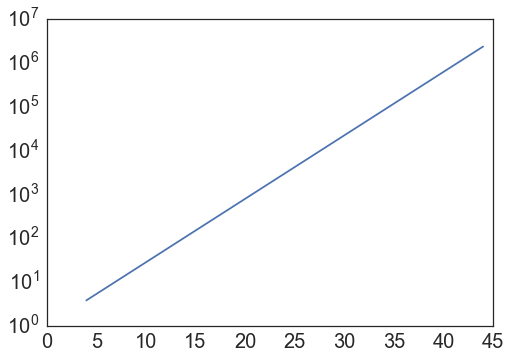

In [5]:
# For now, assume linear relationship between influx (permeability) and pumping rate

T = np.arange(4.,45.)
rI = np.exp(T/3)

plt.plot(T, rI)
plt.yscale('log')
plt.show()

## Attempt 2

Our goal is the same: to plot/predict changes in intracellular pH over time.

**Assumptions:**

1. Mean field flux across the membrane (not considering actions of individual pumps)
2. Pumping rate is dependent on intracellular pH (for now we are estimating this based on experimental findings - a deeper lit search may reveal that this has been measured empirically)
3. Extracellular glucose concentration is constant - this means we can assume that proton influx due to sugar import is small/negligable.
4. Extracellular pH is spatially homogeneous, and the actions of individual cells do not change the ion concentration of the exterior (infinite proton bath).
5. For now we neglect the activity of Vma1 and the proton reservoir within the vacuole. This is done to simplify the system initially, but once the foundation has been established we will add this back in, as we think it will substantially affect interesting pH dynamics and the stress response. 
6. Permeability of the membrane is a function of temperature. The shape/nature of this relationship will be explored below, but making this assumption is important because *damage to the integrity of the membrane is the cited reason for pH drop during heat shock.*

**Derivation:**

In general we can say that the change in pH (the number of protons within in the cell) as a function of time (the rate of change of intracellular protons, $\frac{dH^+}{dt}$) is equal to the rate of protons flowing in minus the rate of protons flowing out. Under the assumptions listed above, we can make this more specific, and say that $\frac{dH^+}{dt}$ is only a combination of the rate of active pumping out of protons, and the diffusion of protons across the membrane, which is driven by the concentration gradient and modulated by the permeability of the membrane.

\begin{equation}
    \begin{aligned}
        \frac{d[H^+]}{dt} &= Pma1 \; activity \; + \; diffusion\\
        &= -r_{pma1}([H^+]_{int}(t)) \; + \; P(T) \times \left[[H^+]_{ext}(t) - [H^+]_{int}(t)\right] \times A
    \end{aligned}    
\end{equation}

where $P(T)$ is the membrane permeability (as a function of temperature) with units time$^{-1}$ length$^{-1}$, $A$ is the surface area of the cell, and $r_{pma1}$ is the rate of pumping of Pma1; this value is dependent on the intracellular pH and will be measured in units of protons per second per area (which is the experimentally measured value).

Note that in this convention outward movement is designated as negative and inward as positive.

The idea that permeability is a function of temperature is the stated reason in the literature for changes in proton concentration across the membrane. However, this has not been experimentally demonstrated.

**IDEA:** heat buffer hotter than 42, transfer to flow tube with a cozy, use a thermometer to measure temperature inside to determine how long the solution stays at 42 for.
Instant read thermometer??